## 과제 1

이번 과제에서는 운동학적인 자전거 모델을 구현합니다.</br>
이 모델은 속도와 조향을 입력으로 받습니다.</br>
이후 자전거의 운동 방정식을 통해 움직이게 됩니다.</br>
자전거는 다음의 수식들을 통해 제어 됩니다.</br>

\begin{align*}
\dot{x}_c &= v \cos{(\theta + \beta)} \\
\dot{y}_c &= v \sin{(\theta + \beta)} \\
\dot{\theta} &= \frac{v \cos{\beta} \tan{\delta}}{L} \\
\dot{\delta} &= \omega \\
\beta &= \tan^{-1}(\frac{l_r \tan{\delta}}{L})
\end{align*}


위의 수식에서 입력으로 받는 것은 속도 $v$와 조향각의 의 비율인 $\omega$ 두 가지가 됩니다.</br>
입력이 단순화될 경우 직접 넣어주는 $\delta$가 될 수도 있습니다.<br/>
이 모델을 만들고 관리하기 쉽게 하기 위해 Python의 클래스 객체를 사용하여 구현하도록 하겠습니다.</br>
자전거는 초기 조건이 0인 상태에서 시작하며 속도가 1.22 rad/s, 축거 길이가 2m, 무게중심으로부터 리어 액슬까지 떨어진 길이가 1.2m가 됩니다.</br>
따라서 이런 조건으로 Python 객체를 초기화 합니다.

In [2]:
from notebook_grader import BicycleSolution, grade_bicycle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

class Bicycle():
    def __init__(self):
        self.xc = 0
        self.yc = 0
        self.theta = 0
        self.delta = 0
        self.beta = 0
        
        self.L = 2
        self.lr = 1.2
        self.w_max = 1.22
        
        self.sample_time = 0.01
        
    def reset(self):
        self.xc = 0
        self.yc = 0
        self.theta = 0
        self.delta = 0
        self.beta = 0

자전거가 움직이는 시간에 따라 운동학을 전파시키기 위해 수치적분을 위한 샘플 시간이 필요합니다.</br>
이 샘플 시간은 10 밀리 초로 설정합니다.</br>
또한 모든 상태 변수를 0으로 초기화할 수 있는 함수도 있습니다.</br>

아래 셀에 정의 된 $\textit{step}$함수는 샘플 시간을 이용해서 운동학적 모델을 구현하는 함수입니다.</br>
$\textit{step}$함수는 입력으로 속도 + 각속도를 받고 상태변수를 업데이트하게 됩니다.</br>

단, 자전거의 최대 회전율을 고려하여 구현하셔야 합니다.

## 코드 작성 (1) - 자전거 모델링

In [5]:
class Bicycle(Bicycle):
    def step(self, v, w):
        # ==================================
        # 여기에 코드를 작성하시오.
        # ==================================
        pass



NameError: name 'Bicycle' is not defined

모델 설정을 통해 자전거를 생성하고 궤적 또한 생성할 수 있게 되었습니다.</br>
만약 모델이 반경 10m의 원을 20초 동안 이동하기 원한다고 가정하면 곡률 반경과 조향각 사이의 관계식을 통해 원하는 조향각을 계산할 수 있습니다.

\begin{align*}
    \tan{\delta} &= \frac{L}{r} \\
    \delta &= \tan^{-1}(\frac{L}{r}) \\
           &= \tan^{-1}(\frac{2}{10}) \\
           &= 0.1974
\end{align*}

위의 식에 따라 단순히 자전거 모델의 조향 각도를 0.1974로 설정하면 추가로 조향을 입력으로 주지 않더라도 자전거가 원을 그리게 됩니다.

원하는 속도는 원의 둘레를 이용해서 아래와 같이 계산할 수 있습니다.

\begin{align*}
    v &= \frac{d}{t}\\
     &= \frac{2 \pi 10}{20}\\
     &= \pi
\end{align*}

이제 루프문을 통해 구현한 모델의 방정식을 단계별로 수행할 수 있습니다.

그리고 구현한 모델과 함께 자전거 모델 솔루션을 실행하여 예상 궤적을 보여주고 구현한 모델이 얼마나 잘 구현되었는지 확인할 수 있습니다.

In [4]:
sample_time = 0.01
time_end = 20
model = Bicycle()
solution_model = BicycleSolution()

# 델타를 직접 넣어주어 설정
model.delta = np.arctan(2/10)
solution_model.delta = np.arctan(2/10)

t_data = np.arange(0,time_end,sample_time)
x_data = np.zeros_like(t_data)
y_data = np.zeros_like(t_data)
x_solution = np.zeros_like(t_data)
y_solution = np.zeros_like(t_data)

for i in range(t_data.shape[0]):
    x_data[i] = model.xc
    y_data[i] = model.yc
    model.step(np.pi, 0)
    
    x_solution[i] = solution_model.xc
    y_solution[i] = solution_model.yc
    solution_model.step(np.pi, 0)
    
    #model.beta = 0
    #solution_model.beta=0
    
plt.axis('equal')
plt.plot(x_data, y_data,label='Learner Model')
plt.plot(x_solution, y_solution,label='Solution Model')
plt.legend()
plt.show()

NameError: name 'Bicycle' is not defined

위의 그림은 10m 반지름을 갖는 원을 보여줍니다.</br>
그러나 모델의 경로가 $\beta$로 인해 사이드 슬립 효과가 생겨 약간의 오프셋이 생깁니다.

이는 코드의 마지막 줄의 주석을 제거하여 $\beta=0$으로 초기화 시켜주면 오프셋이 사라지고 원이 (0, 10)의 중앙에 위치하는 것을 볼 수 있습니다.

그러나 실제로는 조향 각도를 직접 설정할 수 없습니다.</br>
따라서 각도 비율 입력 $\omega$를 통해 변경해야 합니다.</br>
아래의 셀은 이것을 수정해서 동일한 원 궤적을 만들 수 있도록 각속도 입력을 설정합니다.</br>
이 때, 속도$v$는 여전히 $\pi$ m/s로 유지 됩니다.

In [1]:
sample_time = 0.01
time_end = 20
model.reset()
solution_model.reset()

t_data = np.arange(0,time_end,sample_time)
x_data = np.zeros_like(t_data)
y_data = np.zeros_like(t_data)
x_solution = np.zeros_like(t_data)
y_solution = np.zeros_like(t_data)

for i in range(t_data.shape[0]):
    x_data[i] = model.xc
    y_data[i] = model.yc
    
    if model.delta < np.arctan(2/10):
        model.step(np.pi, model.w_max)
    else:
        model.step(np.pi, 0)
        
    x_solution[i] = solution_model.xc
    y_solution[i] = solution_model.yc
    
    if solution_model.delta < np.arctan(2/10):
        solution_model.step(np.pi, model.w_max)
    else:
        solution_model.step(np.pi, 0)    

plt.axis('equal')
plt.plot(x_data, y_data,label='Learner Model')
plt.plot(x_solution, y_solution,label='Solution Model')
plt.legend()
plt.show()

NameError: name 'model' is not defined

다음은 정사각형, 나선형, 파동 경로를 나타내는 궤적들입니다. </br>
보고 싶은 궤적의 주석을 제거하여 확인하면 됩니다.

## 코드 작성 (2) - 사각형 경로 작성

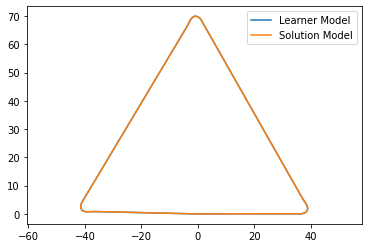

In [ ]:
sample_time = 0.01
time_end = 60
model.reset()
solution_model.reset()

t_data = np.arange(0,time_end,sample_time)
x_data = np.zeros_like(t_data)
y_data = np.zeros_like(t_data)
x_solution = np.zeros_like(t_data)
y_solution = np.zeros_like(t_data)

# maintain velocity at 4 m/s
v_data = np.zeros_like(t_data)
v_data[:] = 4 

w_data = np.zeros_like(t_data)


# ==================================
#  삼각형 경로
# ==================================
w_data[900:1000] = 0.975
w_data[1000:1100] = -0.975
w_data[2900:3000] = 0.975
w_data[3000:3100] = -0.975
w_data[4900:5000] = 0.975
w_data[5000:5100] = -0.975

# ==================================
#  나선형 경로
# ==================================
# w_data[:] = -1/100
# w_data[0:100] = 1

# ==================================
#  웨이브 경로
# ==================================
# w_data[:] = 0
# w_data[0:100] = 1
# w_data[100:300] = -1
# w_data[300:500] = 1
# w_data[500:5700] = np.tile(w_data[100:500], 13)
# w_data[5700:] = -1

# ==================================
#  사각형 경로
# ==================================
# 여기에 코드를 적으시오.

for i in range(t_data.shape[0]):
    x_data[i] = model.xc
    y_data[i] = model.yc
    model.step(v_data[i], w_data[i])

    x_solution[i] = solution_model.xc
    y_solution[i] = solution_model.yc
    solution_model.step(v_data[i], w_data[i])
    
plt.axis('equal')
plt.plot(x_data, y_data,label='Learner Model')
plt.plot(x_solution, y_solution,label='Solution Model')
plt.legend()
plt.show()

이제 마지막으로 자전거가 8자 모양의 궤적을 그려보겠습니다.</br>
아래 그림의 반지름은 8m이며 자전거는 이 경로를 30초 내로 완주해야 합니다.</br>

아래 셀에서는 구현에 필요한 속도와 조향 속도 입력을 결정하게 됩니다.</br>
또한, v_data와 w_data 배열에 입력을 저장하고 이 배열을 이용해서 솔루션을 평가하는데 사용하게 됩니다.
아래의 셀은 구현된 모델에 의해서 생성된 궤적을 보여줍니다.

## 코드 작성 (3) - 8자 경로 작성

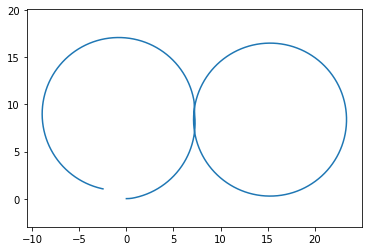

In [ ]:
sample_time = 0.01
time_end = 30
model.reset()

t_data = np.arange(0,time_end,sample_time)
x_data = np.zeros_like(t_data)
y_data = np.zeros_like(t_data)
v_data = np.zeros_like(t_data)
w_data = np.zeros_like(t_data)

# ==================================
#  Learner solution begins here
# ==================================
radius = 8
delta = 0.993 * np.arctan(model.L / radius)  # 0.993은 더 좋은 결과를 위해 곱해주는 것으로 신경쓰지 않아도 됩니다.
v_data[:] = (2 * np.pi * 2 * radius) / (time_end)

for i in range(t_data.shape[0]):
    x_data[i] = model.xc
    y_data[i] = model.yc

    #속도가 고정일 때 자전거가 8자를 그리게 하기 위해서 총 길이를 8등분을 할 수 있습니다.
    #각각의 부분에 w_data에 들어갈 코드를 입력하시오.
    if i <= t_data.shape[0]/8:
        if model.delta < delta:
            model.step(v_data[i], model.w_max)
            w_data[i] = 
        else:
            model.step(v_data[i], 0)
            w_data[i] = 
            
    elif i <= (5.1*t_data.shape[0])/8:
        if model.delta > -delta:
            model.step(v_data[i], -model.w_max)
            w_data[i] = 
        else:
            model.step(v_data[i], 0)
            w_data[i] = 
            
    else:
        if model.delta < delta:
            model.step(v_data[i], model.w_max)
            w_data[i] = 
        else:
            model.step(v_data[i], 0)
            w_data[i] =   
# ==================================
#  Learner solution ends here
# ==================================
plt.axis('equal')
plt.plot(x_data, y_data)
plt.show()

이제 채점용 자전거에 속도와 각속도를 입력해줍니다.
그럼 채점용 자전거는 위의 그림과 같은 궤도에서 몇 개의 웨이트 포인트를 생성하고 이런 웨이트 포인트 주변에는 1.5m의 오류 허용 원이 있어서 생성된 궤적이 이 원의 80% 내에 있을 경우 정답으로 채점됩니다.

Assessment passed! Your trajectory meets 100.0% of the waypoints.


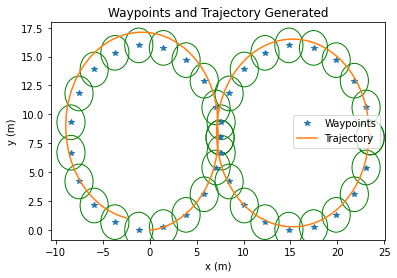

In [ ]:
grade_bicycle(t_data,v_data,w_data)